In [79]:
import numpy as np
from matplotlib import pyplot as plt 
import cv2 
%matplotlib inline

12. Using OpenCV 2, read a single colored image, split it into R, G, and B channels and display the original image and each one of the channels in the same plot.


kids.png


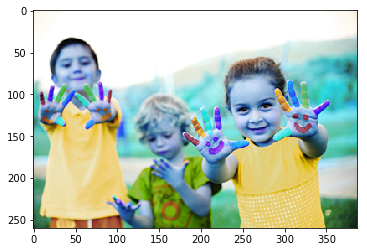

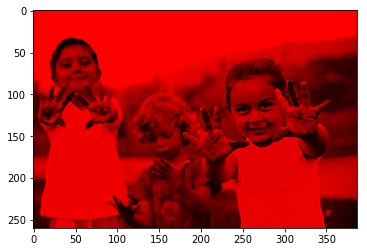

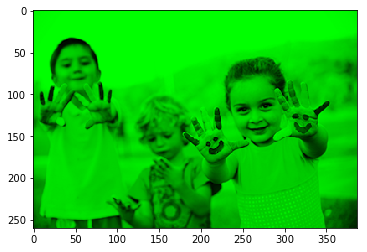

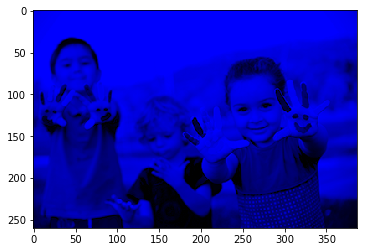

"\nor \n\nimg = cv2.imread('zozo.jpg')\nb,g ,r = cv2.split(img)\n\ncv2.imshow( 'b',r)\ncv2.waitKey()\ncv2.destroyAllWindows()\n\n"

In [13]:
img_path = input()
#read color image 
img = cv2.imread(img_path)

#make a copy of the image 
b = img.copy()
#get the blue channel 
b[:,:,1] = 0
b[:,:,2]=0

#make a copy of the image 
g = img.copy()
#get the green channel 
g[:,:,0] = 0
g[:,:,2]=0

#make a copy of the image 
r = img.copy()
#get the red channel 
r[:,:,0] = 0
r[:,:,1]=0

imglist = [img , b , g , r]

#in opencv is BGR
#in matplotlib the image is RGP 


def showImages(imgs):
    for img in imgs : 
        #plt.figure(1) 
        #plt.subplot(211)            
        plt.imshow(img)
        plt.show()
        
        
showImages(imglist)

'''
or 

img = cv2.imread('zozo.jpg')
b,g ,r = cv2.split(img)

cv2.imshow( 'b',r)
cv2.waitKey()
cv2.destroyAllWindows()

'''

=====================================================================================================================

2. Using OpenCV 2, read two gray images, blend them using factors 0.3, and 0.7, and display the original image and the blended image in the same plot. The script must ask the user (you) for the paths dynamically.  [Practical] 

gray1.jpg
gray2.jpg


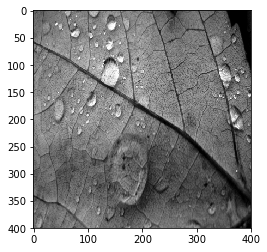

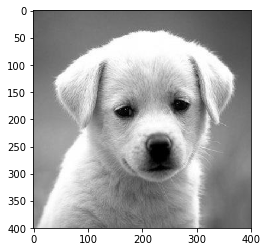

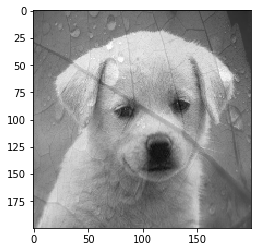

In [45]:
gray1 = input()
gray2 = input()
img_gray1 = cv2.imread(gray1)
img_gray2 = cv2.imread(gray2)


#resize the two images 
img_gray1 = cv2.resize(img_gray1 , (400 , 400))
img_gray2 = cv2.resize(img_gray2 , (400 , 400))

#add the two images with weights 
bended_img = cv2.addWeighted(img_gray1 , .3 , img_gray2 , .7 , 0)

gray_img_list = [img_gray1 , img_gray2 , res]

showImages(gray_img_list)

=======================================================================================================================

3.Using OpenCV 2, read two gray images, subtract the first image from the second image, and display the original image and the result image in the same plot. The script must ask the user (you) for the paths dynamically.  

gray1.jpg
gray2.jpg


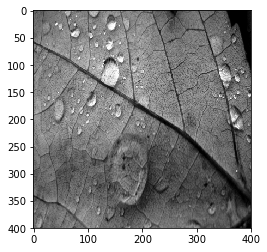

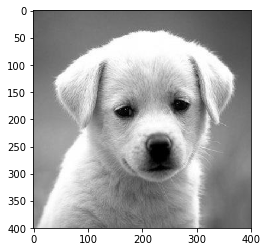

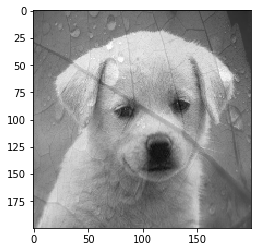

In [46]:
gray1 = input()
gray2 = input()
img_gray1 = cv2.imread(gray1)
img_gray2 = cv2.imread(gray2)


#resize the two images 
img_gray1 = cv2.resize(img_gray1 , (400 , 400))
img_gray2 = cv2.resize(img_gray2 , (400 , 400))

#add the two images with weights 
sub_img = cv2.subtract(img_gray1 , img_gray2)

sub_img_list = [img_gray1 , img_gray2 , sub_img]

showImages(gray_img_list)

=======================================================================================================================

4.Using OpenCV 2, read a single colored image, rotate by a 60 degrees and display the original image and the rotated image in the same plot. The script must ask the user (you) for the path dynamically.  [Practical] 

gray2.jpg
[[   0.5          -0.8660254   273.20508076]
 [   0.8660254     0.5         -73.20508076]]


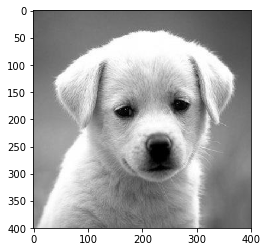

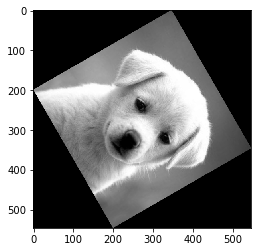

In [67]:
import numpy as np
img_path = input()

img = cv2.imread(img_path)
img = cv2.resize(img , (400,400))
y,x = img.shape[:2]

#get the rotational matrix 
M = cv2.getRotationMatrix2D((x/2,y/2),-60 ,1)
print(M)

cos = np.abs(M[0, 0])
sin = np.abs(M[0, 1])
 
# compute the new bounding dimensions of the image
nW = int((y * sin) + (x * cos))
nH = int((y * cos) + (x * sin))

# adjust the rotation matrix to take into account translation
M[0, 2] += (nW / 2) - x/2
M[1, 2] += (nH / 2) - y/2
 
# perform the actual rotation and return the image
img2 = cv2.warpAffine(img, M, (nW, nH))

rotated_list =[img , img2]

showImages(rotated_list)

4.Using OpenCV 2, read a single colored image, perform image thresholding on it and display the original image and the result image in the same plot. The script must ask the user (you) for the path dynamically

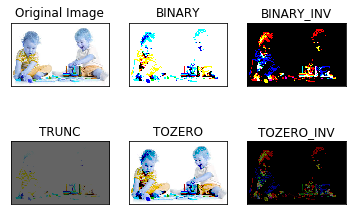

In [85]:
imgPath = input()
img = cv2.imread(imgPath)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    #define the number of images in each row 
    plt.subplot(2,3,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    #remove the y , x axis 
    plt.xticks([]),plt.yticks([])
plt.show()

5.Using OpenCV 2, read a single colored image, extract a specific ROI from the image, and export it with a suitable name and extension.  The script must ask the user (you) for the path and ROI dimensions dynamically. 

In [7]:
import cv2
imgPath = input()

img = cv2.imread(imgPath)

fromCenter = False
showCrosshair = False
r = cv2.selectROI('Image',img, fromCenter , showCrosshair)
  
# Crop image
imCrop = img[int(r[1]):int(r[1]+r[3]), int(r[0]):int(r[0]+r[2])]
#save image 
cv2.imwrite('imcrop.png' , imCrop) 
# Display cropped image
cv2.imshow("Image", imCrop)
cv2.waitKey(0)
cv2.destroyAllWindows()

kids.png


# Build a documented Python class to perform tasks (12 to 17) dynamically.

In [73]:
'''
==============================================================
class editImage : to perform some operations on images 
methods :
 *getBlueChannel : to get the blue channel of a color image
 *getRedChannel  : to get the red channel of a color image
 *getRedChannel  : to get the green channel of a color image
 *showImages     : to display multiple images in the same plot 
 *splitChannel   : to choose which channel (R,G,B) of an image
 *rotateImg      : to rotate image by any angle you want 
 *threshold      : to perform all threshold to an image and 
                   display all images in the same plot
 *findROI        : to find region of interest 

 Author : Zynab Smaan
 =============================================================
'''

class editImage :
    
    def __init__(self , imgPath) :
        self.IMGPATH = imgPath
        self.IMG = cv2.imread(imgPath)
        
    
    
    def __showImages(self,imgs):
        for img in imgs : 
            #plt.figure(1) 
            #plt.subplot(len(imgs)//3 ,3)            
            plt.imshow(img)
            plt.show()
        
    
    
    def splitChannel(self , ch) :
        """
        params :-
        *ch      : is the cannel you want the image at 
        **output : image with the choosed channel  
        """
        #change the channel cause the matplotlib see (RGB)
        img = cv2.merge((r,g,b))
        img = self.IMG.copy()
        img_list = []
        if ch == 'r' :
            red_img = self.__getRedChannel(img)              
            img_list = [red_img]
        elif ch == 'g' :
            green_img = self.__getGreenChannel(img)
            img_list = [green_img]
        elif ch == 'b' :
            blue_img = self.__getBlueChannel(img) 
            img_list = [blue_img]
            
        elif ch == 'all' :
            img = self.IMG.copy()
            red_img = self.__getRedChannel(img)
            img = self.IMG.copy()
            green_img = self.__getGreenChannel(img)
            img = self.IMG.copy()
            blue_img = self.__getBlueChannel(img)
            
            img_list = [red_img , green_img , blue_img]
            
        self.__showImages(img_list)
       
    
    def __getBlueChannel(self , img) :
        img[:,:,0]=0
        img[:,:,1]=0
        return img 
    
    def __getRedChannel(self , img) :
        img[:,:,1]=0
        img[:,:,2]=0
        return img
    
    def __getGreenChannel(self , img) :
        img[:,:,0]=0
        img[:,:,2]=0
        return img
        
    def rotateImg(self , angle=90) :
        
        """
        params :
        *angle : the angle you want to rotate the image by
        """
        img = self.IMG.copy()
        img = cv2.resize(img , (400,400))
        y,x = img.shape[:2]

        #get the rotational matrix 
        M = cv2.getRotationMatrix2D((x/2,y/2),angle ,1)

        cos = np.abs(M[0, 0])
        sin = np.abs(M[0, 1])
 
        # compute the new bounding dimensions of the image to be not a cropped image 
        nW = int((y * sin) + (x * cos))
        nH = int((y * cos) + (x * sin))

        # adjust the rotation matrix to take into account translation
        M[0, 2] += (nW / 2) - x/2
        M[1, 2] += (nH / 2) - y/2
 
        # perform the actual rotation and return the image
        img = cv2.warpAffine(img, M, (nW, nH))

        rotated_list =[img]
        self.__showImages(rotated_list)
            
            
            
    def threshold(self , thresh , maxValue=255) :
        
        """
           params :
           *thresh   : the value you want to threshold at 
           *maxValue : the max value 
           **output  : multiple images with different threshold
        """
        img = self.IMG.copy()
        ret,thresh1 = cv2.threshold(img,thresh,maxValue,cv2.THRESH_BINARY)
        ret,thresh2 = cv2.threshold(img,thresh,maxValue,cv2.THRESH_BINARY_INV)
        ret,thresh3 = cv2.threshold(img,thresh,maxValue,cv2.THRESH_TRUNC)
        ret,thresh4 = cv2.threshold(img,thresh,maxValue,cv2.THRESH_TOZERO)
        ret,thresh5 = cv2.threshold(img,thresh,maxValue,cv2.THRESH_TOZERO_INV)

        titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
        images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

        for i in range(6):
            #define the number of images in each row 
            plt.subplot(2,3,i+1),plt.imshow(images[i])
            plt.title(titles[i])
            #remove the y , x axis 
            plt.xticks([]),plt.yticks([])
        plt.show()
         
            
            
    def findROI(self) :
        img = self.IMG.copy()
        fromCenter = False
        showCrosshair = False
        r = cv2.selectROI('Image',img, fromCenter , showCrosshair)
  
        # Crop image
        imgCrop = img[int(r[1]):int(r[1]+r[3]), int(r[0]):int(r[0]+r[2])]
        #save image 
        cv2.imwrite('imcrop.png' , imgCrop) 
        # Display cropped image
        cv2.imshow("Image", imCrop)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
            

In [74]:
obj = editImage('kids.png')

In [75]:
obj.findROI()

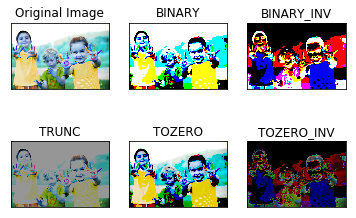

In [76]:
obj.threshold(150)

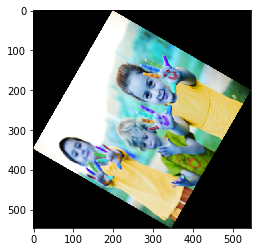

In [77]:
obj.rotateImg(60)

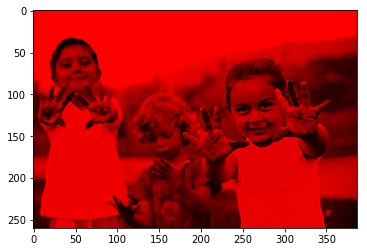

In [78]:
obj.splitChannel('r')